# Clustering of Commercial sites

## Load Data to Pandas Dataframe

In [1]:
import geopandas as gpd

gdf = gpd.read_file('NewDelhi.geojson')
gdf

,id,@id,amenity,name,atm,created_by,brand,brand:wikidata,brand:wikipedia,cuisine,...,drink:shake,seats,healthcare,addr:district,addr:subdistrict,addr:full,addr:state,contact:mobile,operator:type,geometry
0,node/248852574,node/248852574,cafe,Cafe Coffee Day,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.15189 28.53349)
1,node/248852583,node/248852583,bank,"ICICI, SBI, Citibank,",yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.15200 28.53365)
2,node/266442982,node/266442982,cinema,PVR Priya,None,Potlatch 0.9a,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.16449 28.55731)
3,node/266443204,node/266443204,bank,Standard Chartered Bank,yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.16455 28.55785)
4,node/266443228,node/266443228,fast_food,McDonald's,None,None,McDonald's,Q38076,en:McDonald's,burger,...,None,None,None,None,None,None,None,None,None,POINT (77.16376 28.55733)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,node/6908305667,node/6908305667,drinking_water,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.18404 28.57045)
969,node/6918479553,node/6918479553,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21682 28.59044)
970,node/6918479554,node/6918479554,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21676 28.59068)
971,node/6918479556,node/6918479556,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21688 28.59023)


In [2]:
gdf.columns

Index(['id', '@id', 'amenity', 'name', 'atm', 'created_by', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'cuisine',
       ...
       'drink:shake', 'seats', 'healthcare', 'addr:district',
       'addr:subdistrict', 'addr:full', 'addr:state', 'contact:mobile',
       'operator:type', 'geometry'],
      dtype='object', length=138)

In [3]:
gdf = gdf[['id','amenity', 'geometry']]
gdf

,id,amenity,geometry
0,node/248852574,cafe,POINT (77.15189 28.53349)
1,node/248852583,bank,POINT (77.15200 28.53365)
2,node/266442982,cinema,POINT (77.16449 28.55731)
3,node/266443204,bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,POINT (77.16376 28.55733)
...,...,...,...
968,node/6908305667,drinking_water,POINT (77.18404 28.57045)
969,node/6918479553,fountain,POINT (77.21682 28.59044)
970,node/6918479554,fountain,POINT (77.21676 28.59068)
971,node/6918479556,fountain,POINT (77.21688 28.59023)


### Data Cleaning

In [4]:
gdf.dropna(inplace=True)
gdf

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,amenity,geometry
0,node/248852574,cafe,POINT (77.15189 28.53349)
1,node/248852583,bank,POINT (77.15200 28.53365)
2,node/266442982,cinema,POINT (77.16449 28.55731)
3,node/266443204,bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,POINT (77.16376 28.55733)
...,...,...,...
968,node/6908305667,drinking_water,POINT (77.18404 28.57045)
969,node/6918479553,fountain,POINT (77.21682 28.59044)
970,node/6918479554,fountain,POINT (77.21676 28.59068)
971,node/6918479556,fountain,POINT (77.21688 28.59023)


In [5]:
import folium


city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [6]:
gdf['amenity'].unique()

array(['cafe', 'bank', 'cinema', 'fast_food', 'school', 'fuel', 'parking',
       'restaurant', 'fire_station', 'pharmacy', 'post_box', 'hospital',
       'toilets', 'atm', 'club', 'bus_station', 'embassy',
       'Netaji Nagar Market', 'Suvidha Market, Netaji Nagar',
       'place_of_worship', 'college', 'police', 'Ayurvedic Hospital',
       'House', 'public_building', 'marketplace', 'library', 'bar',
       'kindergarten', 'taxi', 'waste_basket', 'bench', 'doctors',
       'bureau_de_change', 'pub', 'fast_food;bar', 'post_office',
       'theatre', 'community_centre', 'courthouse', 'car_wash',
       'food_court', 'fountain', 'veterinary', 'training',
       'drinking_water', 'bicycle_parking', 'bicycle_rental',
       'vending_machine', 'money_transfer', 'car_rental', 'telephone',
       'waste_disposal', 'bicycle_repair_station', 'nightclub', 'dentist',
       'arts_centre', 'music_school', 'internet_cafe', 'coworking_space',
       'charging_station', 'shelter', 'conference_centr

In [7]:
commerical_amenities = [
    'cafe', 'bank', 'cinema', 'fast_food', 'school', 'parking','restaurant', 'hospital', 'club', 'bus_station', \
    'embassy', 'Netaji Nagar Market', 'Suvidha Market, Netaji Nagar', 'place_of_worship', 'college', \
    'Ayurvedic Hospital','public_building', 'marketplace', 'library', 'bar', 'pub', 'fast_food;bar', \
    'post_office', 'theatre', 'community_centre', 'courthouse', 'food_court', 'nightclub', 'dentist', \
    'arts_centre', 'music_school', 'internet_cafe', 'coworking_space', 'conference_centre', 'blood_bank'
]

In [8]:
gdf = gdf.loc[gdf['amenity'].isin(commerical_amenities)]
gdf

,id,amenity,geometry
0,node/248852574,cafe,POINT (77.15189 28.53349)
1,node/248852583,bank,POINT (77.15200 28.53365)
2,node/266442982,cinema,POINT (77.16449 28.55731)
3,node/266443204,bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,POINT (77.16376 28.55733)
...,...,...,...
963,node/6895185767,blood_bank,POINT (77.11773 28.58659)
964,node/6895185773,blood_bank,POINT (77.14185 28.53276)
965,node/6895185775,blood_bank,POINT (77.20070 28.62648)
966,node/6898010185,fast_food,POINT (77.21742 28.63073)


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 492 entries, 0 to 967
Data columns (total 3 columns):
id          492 non-null object
amenity     492 non-null object
geometry    492 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 15.4+ KB


In [10]:
city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

## Clustering of POIs using HDBScan

In [11]:
from hdbscan import HDBSCAN
import numpy as np

model = HDBSCAN(metric='haversine', min_cluster_size=5)

model.fit(np.radians(list(zip(gdf.geometry.y, gdf.geometry.x))))

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='haversine', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [12]:
np.radians(list(zip(gdf.geometry.y, gdf.geometry.x)))

array([[0.49800338, 1.34655459],
       [0.49800609, 1.34655644],
       [0.49841906, 1.34677447],
       [0.49842844, 1.34677544],
       [0.49841951, 1.34676171],
       [0.4972331 , 1.34630959],
       [0.49785599, 1.34664469],
       [0.49829062, 1.34713265],
       [0.4992854 , 1.34791637],
       [0.49913581, 1.34713973],
       [0.49809894, 1.34657247],
       [0.49913031, 1.34706172],
       [0.49912593, 1.34705978],
       [0.49853585, 1.34723623],
       [0.49903489, 1.34603813],
       [0.49930799, 1.34628892],
       [0.49909903, 1.34700499],
       [0.49977664, 1.3477379 ],
       [0.49973769, 1.34776505],
       [0.4997304 , 1.34776445],
       [0.49971945, 1.34775719],
       [0.49971534, 1.34775045],
       [0.49975363, 1.34771937],
       [0.49975906, 1.34773584],
       [0.49977319, 1.34778209],
       [0.49977927, 1.3477379 ],
       [0.4998894 , 1.34772743],
       [0.49988387, 1.3477211 ],
       [0.49946432, 1.34745543],
       [0.49944694, 1.34756901],
       [0.

In [13]:
clusters = model.labels_
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [14]:
clusters

array([ 4,  4,  8,  8,  8, -1,  4, -1,  6, -1,  4, -1, -1, -1, -1, -1, -1,
       12, 12, 12, 12, 12, 12, 12, 12, 12, -1, -1, -1, -1, -1, -1, 18, 18,
       18, -1, 18, 18, 18, 18, -1, -1, 18, 18, -1, -1, 18, -1, 18, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, 20, -1,  7, -1, -1, 12, -1,
       12,  9, 11, 11,  4,  3,  3, 20, 20, 15, -1, -1, -1, -1,  8,  8,  8,
        8,  5, 12, 12, 19, 12, 12, -1,  0,  0,  0,  0,  0,  0,  0, 12, 20,
       10,  8,  8,  8,  3,  3,  3,  3,  3, -1, 12, 16, 17, 12, 17, -1, -1,
       -1, -1, -1, 19,  4,  4,  8, -1, 12, -1, 18,  0, -1, 12,  0,  0,  0,
       12, 12, 17, 12, -1, -1, 12, 12,  4,  4,  4,  4, -1, 17, 17, 17, 17,
       12, 12, 12,  9, 12,  7, 12, 12,  7,  7, 16, 16, 17, 20, 19, 16, 16,
       -1, -1, -1, 12, 12, 12, 12, 12, 12, 12, 12, -1, 12,  6, -1, -1, 12,
       -1, 12, 10, 12,  9, 12, 12,  9,  9,  9, 12, 12, -1,  1,  1,  1,  1,
       11, -1,  6,  6, -1, 12, 12, 15,  6, -1, 12, -1,  2,  7,  0, 12, 15,
        9, 13, 13, 13, 18

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


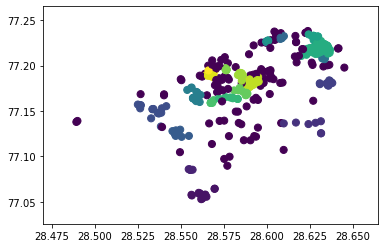

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(gdf.geometry.y, gdf.geometry.x, c=clusters,s=50)
fig.show()

In [16]:
gdf['cluster'] = clusters
gdf

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,amenity,geometry,cluster
0,node/248852574,cafe,POINT (77.15189 28.53349),4
1,node/248852583,bank,POINT (77.15200 28.53365),4
2,node/266442982,cinema,POINT (77.16449 28.55731),8
3,node/266443204,bank,POINT (77.16455 28.55785),8
4,node/266443228,fast_food,POINT (77.16376 28.55733),8
...,...,...,...,...
963,node/6895185767,blood_bank,POINT (77.11773 28.58659),-1
964,node/6895185773,blood_bank,POINT (77.14185 28.53276),4
965,node/6895185775,blood_bank,POINT (77.20070 28.62648),-1
966,node/6898010185,fast_food,POINT (77.21742 28.63073),12


## Removing Outliers

In [17]:
gdf = gdf[gdf.cluster != -1]
gdf

,id,amenity,geometry,cluster
0,node/248852574,cafe,POINT (77.15189 28.53349),4
1,node/248852583,bank,POINT (77.15200 28.53365),4
2,node/266442982,cinema,POINT (77.16449 28.55731),8
3,node/266443204,bank,POINT (77.16455 28.55785),8
4,node/266443228,fast_food,POINT (77.16376 28.55733),8
...,...,...,...,...
957,node/6885031739,blood_bank,POINT (77.21737 28.63662),12
958,node/6885031740,blood_bank,POINT (77.21319 28.63542),12
959,node/6888422272,blood_bank,POINT (77.18135 28.59293),18
964,node/6895185773,blood_bank,POINT (77.14185 28.53276),4


/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


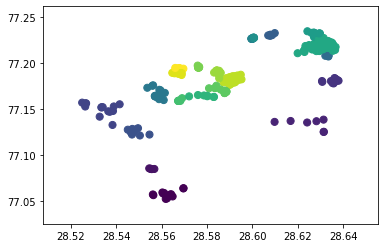

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(gdf.geometry.y, gdf.geometry.x, c=gdf.cluster,s=50)
fig.show()

In [19]:
city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [20]:
gdf['cluster'].value_counts()

12    169
8      28
18     21
15     16
4      14
5      12
0      12
16     10
3      10
11     10
19     10
17     10
9       8
14      7
13      7
2       7
6       7
20      6
7       5
1       5
10      5
Name: cluster, dtype: int64

## Create Convex Hull for each cluster

In [21]:
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon

def create_hull(points):
    points = np.array(list(zip(points.geometry.x, points.geometry.y)))
    hull = ConvexHull(points)
    hull_points = points[hull.vertices,0], points[hull.vertices,1]
    
    return Polygon(zip(points[hull.vertices,0], points[hull.vertices,1]))    

In [22]:
clusters = dict()

for c in gdf.cluster.unique():
    clusters['cluster_' + str(c)] = create_hull(gdf[gdf.cluster == c])
clusters

{'cluster_4': <shapely.geometry.polygon.Polygon at 0x7f05f3ce35d0>,
 'cluster_8': <shapely.geometry.polygon.Polygon at 0x7f05f3ce31d0>,
 'cluster_6': <shapely.geometry.polygon.Polygon at 0x7f05f3ce33d0>,
 'cluster_12': <shapely.geometry.polygon.Polygon at 0x7f05f3ce32d0>,
 'cluster_18': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3550>,
 'cluster_3': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3890>,
 'cluster_20': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3590>,
 'cluster_7': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3a10>,
 'cluster_9': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3810>,
 'cluster_11': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3510>,
 'cluster_15': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3990>,
 'cluster_5': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3150>,
 'cluster_19': <shapely.geometry.polygon.Polygon at 0x7f05f3ce39d0>,
 'cluster_0': <shapely.geometry.polygon.Polygon at 0x7f05f3ce3750>,
 'cluster_10': <shapely.geometry.polygon.P

In [23]:
crs = {'init': 'epsg:4326'}

polygon = gpd.GeoDataFrame({
    'cluster': list(clusters.keys()),
    'geometry': list(clusters.values())}, crs=crs)
polygon

,cluster,geometry
0,cluster_4,"POLYGON ((77.15527 28.54155, 77.13287 28.53841..."
1,cluster_8,"POLYGON ((77.17316 28.55373, 77.17581 28.55628..."
2,cluster_6,"POLYGON ((77.22956 28.60784, 77.22992 28.60695..."
3,cluster_12,"POLYGON ((77.21319 28.63542, 77.21061 28.61990..."
4,cluster_18,"POLYGON ((77.17618 28.58989, 77.17897 28.58725..."
5,cluster_3,"POLYGON ((77.18047 28.63064, 77.18369 28.63612..."
6,cluster_20,"POLYGON ((77.19385 28.56960, 77.19372 28.56742..."
7,cluster_7,"POLYGON ((77.20843 28.63344, 77.20704 28.63345..."
8,cluster_9,"POLYGON ((77.22639 28.59953, 77.22629 28.59996..."
9,cluster_11,"POLYGON ((77.22804 28.62710, 77.23438 28.62420..."


In [24]:
commercial_cluster = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)
folium.GeoJson(polygon).add_to(commercial_cluster)
folium.LatLngPopup().add_to(commercial_cluster)
commercial_cluster

## Save Commercial clusters into Sharpfile

In [25]:
polygon.to_file(filename='commercial_cluster.geojson', driver='GeoJSON')
polygon.to_file(filename='commercial_cluster.shp', driver="ESRI Shapefile")